In [5]:
import numpy as np
#import argparse
import time
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
from flask import Flask

app = Flask(__name__)



In [16]:
print("a")
@app.route('/getdarknet', methods=['GET'])

def darknet():
#labelsPath = os.path(r"C:\Users\Gumber\Desktop\coco.names.txt")
    LABELS = open(r"./yolo files/coco.names.txt").read().strip().split("\n")
    
# initialize a list of colors to represent each possible class label
    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")
    print(COLORS)

a


AssertionError: View function mapping is overwriting an existing endpoint function: darknet

In [10]:
net = cv2.dnn.readNet(r"./yolo files/yolov3.weights",r"./yolo files/yolov3.cfg")
net


<dnn_Net 0x7f2b0524abf0>

In [25]:
image = cv2.imread(r".\122.png")
dimensions = image.shape
 
# height, width, number of channels in image
H = img.shape[0]
W = img.shape[1] 
#(H, W) = image.shape[:2]


AttributeError: 'NoneType' object has no attribute 'shape'

In [23]:
#cv2.imshow("Image", image)

In [9]:
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]


In [10]:
ln


['yolo_82', 'yolo_94', 'yolo_106']

In [11]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()
print("[INFO] YOLO took {:.6f} seconds".format(end - start))

[INFO] YOLO took 11.649210 seconds


In [12]:
# loop over each of the layer outputs
boxes = []
confidences = []
classIDs = []
for output in layerOutputs:
	# loop over each of the detections
	for detection in output:
		# extract the class ID and confidence (i.e., probability) of
		# the current object detection
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]
 
		# filter out weak predictions by ensuring the detected
		# probability is greater than the minimum probability
		if confidence > 0.0025:
			# scale the bounding box coordinates back relative to the
			# size of the image, keeping in mind that YOLO actually
			# returns the center (x, y)-coordinates of the bounding
			# box followed by the boxes' width and height
			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")
 
			# use the center (x, y)-coordinates to derive the top and
			# and left corner of the bounding box
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))
 
			# update our list of bounding box coordinates, confidences,
			# and class IDs
			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)

In [13]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.0025, 0.0025)

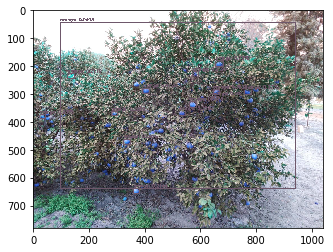

-1

In [14]:
if len(idxs) > 0:
	# loop over the indexes we are keeping
	for i in idxs.flatten():
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])
 
		# draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)
 
# show the output image
cv2.imshow("Image", image)
plt.imshow(image)
plt.show()
cv2.waitKey(0)
